In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [3]:
# fit a polynomial of order 6
one = np.ones(shape=data_y.shape)

X= np.concatenate((one,data_x,data_x**2,data_x**3,data_x**4,data_x**5,data_x**6),1)

In [4]:
#coeffs are the coefficients of the 6 degree polynomial
coeffs=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,data_y))

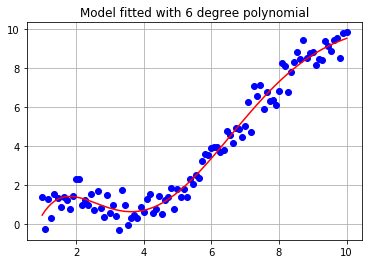

In [5]:
plt.title("Model fitted with 6 degree polynomial")
plt.grid()
plt.plot(data_x,data_y,'bo')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, X @ coeffs,'r-')
plt.xlim=xlim
plt.ylim = ylim

In [6]:
# Implement gradient computation and theta update 
def gradient_descent(X, y,theta, alpha):
    m, n = X.shape
    iter=1000
    errs = np.zeros(iters)

    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, errs

In [7]:
def h(X, theta):
    return X @ theta

In [15]:
def H(theta, X, y):
    return np.mean((h(X, theta) - y)**2)

In [16]:
X.shape

(100, 7)

In [19]:
# Call stochastic gradient descent in the main loop
m,n = X.shape
LR = 0.001
sample_size = 50
epochs = 500
theta = np.zeros(n).reshape(n,1)
costs = []
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_new=X[idx]
    y_new=data_y[idx]
    y_hat= x_new @ theta - y_new
    gradient = (1/m) * x_new.T @ ((x_new@ theta) - y_new)
    theta -= LR * gradient
    costs.append(H(theta,x_new,y_new))
print(theta,costs)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] [1.0767557647135451e+17, 2.4511451417040872e+32, 7.475292260649202e+47, 1.9619462143699143e+63, 1.0110658040610076e+79, 1.8088095478888496e+94, 2.7957677691780945e+109, 7.504381954129605e+124, 1.1735332009690666e+140, 5.298408384364446e+154, 2.493348040956721e+170, 1.641335096843185e+185, 7.507068489311624e+200, 1.0584960845650562e+216, 3.740478917437743e+231, 6.597240939173976e+246, 2.872443095327426e+262, 7.588735585693801e+277, 1.0144541378309055e+293, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

<ipython-input-15-69419c49eb9b>:2: RuntimeWarning: overflow encountered in square
  return np.mean((h(X, theta) - y)**2)
<ipython-input-19-868a01c99613>:13: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * x_new.T @ ((x_new@ theta) - y_new)
<ipython-input-19-868a01c99613>:14: RuntimeWarning: invalid value encountered in subtract
  theta -= LR * gradient


In [10]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
# plot x vs y_hat in red